# **Data Cleaning**

In [2]:
# Import data

import pandas as pd
data = pd.read_csv("bodyPerformance.csv")

In [3]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
# Check missing values

data.isnull().values.any()

False

In [5]:
# Check noisy values
# 1. diastolic
# 2. systolic

data.describe()[['diastolic', 'systolic']]

,diastolic,systolic
count,13393.000000,13393.000000
mean,78.796842,130.234817
std,10.742033,14.713954
min,0.000000,0.000000
25%,71.000000,120.000000
50%,79.000000,130.000000
75%,86.000000,141.000000
max,156.200000,201.000000


In [6]:
# Find outlier and remove records that have noisy values

import numpy as np

dias = data['diastolic']
q1, q3 = np.percentile(dias, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

data = data[(data['diastolic'] >= lower_bound) & (data['diastolic'] <= upper_bound)]

sys = data['systolic']
q1, q3 = np.percentile(sys, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

data = data[(data['systolic'] >= lower_bound) & (data['systolic'] <= upper_bound)]

In [7]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


# **Data Normalization**

In [8]:
# Rename some columns 
data.rename(columns = {'body fat_%':'body_fat_%', 'gripForce':'gripforce',
                       'sit and bend forward_cm':'sit_and_bend_forward_cm',
                       'sit-ups counts':'sit_ups_counts','broad jump_cm':'broad_jump_cm'}, inplace = True)

In [9]:
data

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [10]:
# Add BMI column by the formula --> weight (kg) / [height (m)]^2

data['bmi'] = np.round(data['weight_kg']/np.power(2,data['height_cm']/100),2)

In [11]:
data

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripforce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class,bmi
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,22.79
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,17.78
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,22.46
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,21.21
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,20.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,21.78
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,18.39
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,23.57
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,20.96


# **Correlation** (shua kraw)

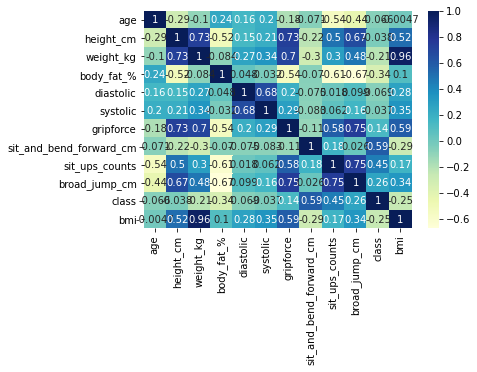

In [13]:
import matplotlib.pyplot as mp
import seaborn as sb

# Factorize class before find corr
data_temp = data
data_temp['class'] = data_temp['class'].replace(['A', 'B', 'C', 'D'], [4, 3, 2, 1])

data_temp.corr()
dataplot = sb.heatmap(data_temp.corr(), cmap="YlGnBu", annot=True)

mp.show()